# Experiment 4: CO2 Emissions 
Defaulting to average carbon intensity 151.6503 gCO2/kWh.

In [58]:
from PIL import Image

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from carbontracker import parser
import pandas as pd

import seaborn as sns

# Define a discrete color palette with a specified number of colors
#sns.set_palette(sns.color_palette("muted", n_colors=10))  # or use another color map and adjust `n_colors`
custom_palette = ["#FFB347", "#779ECB", "#77DD77", "#FF6961", "royalblue", "#CB99C9", "#FDFD96", "#AEC6CF"]
costum_palette_pairs = ['#ffb347', '#ffcc84', '#ffe6c2', 
                        '#779ecb', '#a4bedc', '#d2dfee', 
                        '#77dd77', '#a4e8a4', '#d2f4d2', 
                        '#ff6961', '#ff9b96', '#ffcdca', 
                        '#cb99c9', '#dcbbdb', '#eedded', 
                        '#fdfd96', '#fefeb9', '#fefedc',
                        '#aec6cf', '#c9d9df', '#e4ecef']

sns.set_palette(custom_palette)
colors = sns.color_palette()
colors_pairs = sns.color_palette(costum_palette_pairs) #("tab20c")


# set title font size
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Viscous Burgers eq: NN

In [282]:
# Create a DataFrame
df_nn = pd.DataFrame(columns=["idx", "N_epochs","N_data", "MSE", "CO2"])

# Data to be added
data_nn = [
    ['nn1a', 3000, 2456, 8.000597e-07, 0.173904980060],
    ['nn2a', 3000, 1456 , 3.265962e-06, 0.103083038673], 
    ['nn3a', 2000, 1456, 6.527086e-06, 0.088065603995],
    ['nn4a', 1500, 1456, 1.882004e-05, 0.061664682101],  
    ['nn5a', 1000, 1456, 2.685855e-05, 0.041813144468],
    ['nn6a', 1000, 1000, 1.493149e-04, 0.029513990383],
    ['nn7a', 1000, 1456, 5.331777e-05, 0.039317073879], 
    ['nn8a', 1500, 3956, 3.046996e-06, 0.136334225076],
    ['nn9a', 4000, 2456, 4.942624e-06, 0.225898050900],   
    ['nn10a', 10000, 5000, 2.408499e-07, 1.374135059279],
    ['nn11a', 5000, 1456, 1.621167e-05, 0.174364090738],
    ['nn12a', 4000, 1456, 3.326079e-06, 0.163183105577],
    ['nn13a', 4500, 1456, 8.672482e-07, 0.184120007088],
    ['nn14a', 5000, 1456, 5.042372e-06, 0.202259547501],
    ['nn15a', 3000, 3456, 1.895618e-06, 0.286659496259], 
    ['nn16a', 5000, 3456, 1.468835e-06, 0.476511028995],   
    ['nn17a', 7000, 4456, 1.529511e-06, 0.716947509201],     
    ['nn18a', 9000, 4456, 1.768318e-07, 1.178755296232],     
]

# Add the data to the DataFrame
df_nn = pd.DataFrame(data_nn, columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])
df_nn = df_nn.sort_values(by=['N_epochs', 'N_data'], ascending=[True, True])

# Viscous Burgers eq: PINN

In [283]:
# Number of initial points: 256
# Number of boundary points: 200
N_init = 256
N_bound = 200

# PINN1: Only physics loss

In [284]:
# Create a DataFrame
df_pinn1 = pd.DataFrame(columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])

# Add data to the DataFrame
data_pinn1 = [
    ['pinn1a', [1000, 2000], 2000,  1.324482e-08, 0.076229587779], 
    ['pinn2a', [1000, 2000], 1000,  2.434077e-08, 0.067202135508], 
    ['pinn3a', [1000, 1000], 1000,  7.231965e-08, 0.033772380744], 
    ['pinn4a', [500, 1000], 1000,  1.416168e-07, 0.028901486363], 
    ['pinn5a', [500, 500], 1000,  9.081982e-07, 0.028416809735], 
    ['pinn6a', [500, 500], 544,  1.001571e-06, 0.019004901363],  
    ['pinn7a', [300, 700], 1000,  4.147939e-07, 0.028523291545],
    ['pinn8a', [1000, 500], 3500, 2.569716e-07, 0.071432793866], 
    ['pinn9a', [1000, 3000], 2000, 1.125075e-08, 0.157683321302],
    ['pinn10a', [5000, 5000], 4544, 7.145194e-10, 0.621415952185], 
    ['pinn11a', [2000, 3000], 1000, 4.849116e-09, 0.280131422102], 
    ['pinn12a', [1500, 2500], 1000, 2.291137e-08, 0.094876300465], 
    ['pinn13a', [1500, 3000], 1000, 1.073606e-08, 0.098588098369], 
    ['pinn14a', [2000, 3000], 3000, 7.555908e-09, 0.205624280837], 
    ['pinn15a', [2000, 1000], 3000, 4.749588e-09, 0.241495396715], 
    ['pinn16a', [2000, 3000], 1000, 1.571562e-08, 0.118866279775],  
    ['pinn17a', [3000, 4000], 4000, 2.074357e-09, 0.299638998834], 
    ['pinn18a', [4000, 5000], 4000, 2.752249e-09, 0.364381935825], 
]

df_pinn1 = pd.DataFrame(data_pinn1, columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])
df_pinn1["N_epochs_sum"] = df_pinn1["N_epochs"].apply(sum)
df_pinn1["N_data"] = df_pinn1["N_data"] + N_init + N_bound
df_pinn1 = df_pinn1.sort_values(by=['N_epochs_sum', 'N_data'], ascending=[True, True])

# PINN 2: Physics loss + data loss

In [285]:
# Create a DataFrame
df_pinn2 = pd.DataFrame(columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])

# Add data to the DataFrame
data_pinn2 = [
    ['pinn1a', [1000, 2000], [1000, 1000],  1.253323e-08, 0.056296797317], 
    ['pinn2a', [1000, 2000], [500, 500],  4.473041e-08, 0.038925386519], 
    ['pinn3a', [1000, 1000], [500, 500],  8.222830e-08, 0.023084920520], 
    ['pinn4a', [500, 1000], [500, 500],  2.661344e-07, 0.019493970253], 
    ['pinn5a', [500, 500], [500, 500],  1.279629e-06, 0.011573383948], 
    ['pinn6a', [500, 500], [272, 272],  2.311070e-06, 0.009677524105],  
    ['pinn7a', [300, 700], [500, 500],  2.144258e-06, 0.012001167464],
    ['pinn8a', [1000, 500], [1750, 1750], 3.184053e-07, 0.035816217451], 
    ['pinn9a', [1000, 3000], [1000, 1000], 9.928196e-09, 0.077742365031],
    ['pinn10a', [5000, 5000], [2272, 2272], 1.108156e-09, 0.314603744269], 
    ['pinn11a', [2000, 3000], [500, 500], 3.112426e-08, 0.062921285481], 
    ['pinn12a', [1500, 2500], [500, 500], 2.272767e-08, 0.052354431618], 
    ['pinn13a', [1500, 3000], [500, 500], 1.657158e-08, 0.056750851792], 
    ['pinn14a', [2000, 3000], [500, 500], 5.353327e-08, 0.062427760581], 
    ['pinn15a', [2000, 1000], [1500, 1500], 4.499686e-08, 0.064267898030],  
    ['pinn16a', [2000, 3000], [1500, 1500], 8.526372e-09, 0.118419312280], 
    ['pinn17a', [3000, 4000], [2000, 2000], 5.048278e-09, 0.205236660173], 
    ['pinn18a', [4000, 5000], [2000, 2000], 1.891776e-09, 0.293387606086], 
]

df_pinn2 = pd.DataFrame(data_pinn2, columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])
df_pinn2["N_data_sum"] = df_pinn2["N_data"].apply(sum)
df_pinn2["N_data_sum"] = df_pinn2["N_data_sum"] + N_init + N_bound
df_pinn2["N_epochs_sum"] = df_pinn2["N_epochs"].apply(sum)
df_pinn2 = df_pinn2.sort_values(by=['N_epochs_sum', 'N_data_sum'], ascending=[True, True])

# PINN 3: Physics loss + enforce IC and BC

In [286]:
# Create a DataFrame
df_pinn3 = pd.DataFrame(columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])

# Add data to the DataFrame
data_pinn3 = [
    ['pinn1a', [1000, 2000], 2000,  3.019011e-09, 0.087654487399], 
    ['pinn2a', [1000, 2000], 1000,  2.735140e-08, 0.061250136858], 
    ['pinn3a', [1000, 1000], 1000,  9.180218e-08, 0.036927256937], 
    ['pinn4a', [500, 1000], 1000,  2.083081e-07, 0.027177681143], 
    ['pinn5a', [500, 500], 1000,  1.853932e-07, 0.019153552091], 
    ['pinn6a', [500, 500], 544,  7.594115e-07, 0.012700643416],  
    ['pinn7a', [300, 700], 1000,  1.543066e-07, 0.022959467207],
    ['pinn8a', [1000, 500], 3500, 1.220292e-07, 0.060231492939], 
    ['pinn9a', [1000, 3000], 2000,  5.847614e-09, 0.122368647400], 
    ['pinn10a', [5000, 5000], 4544, 4.190447e-10, 0.566820206939], 
    ['pinn11a', [2000, 3000], 1000, 9.611647e-09, 0.087583719907], 
    ['pinn12a', [1500, 2500], 1000, 6.529601e-08, 0.074148158722], 
    ['pinn13a', [1500, 3000], 1000, 5.153086e-09, 0.088049462813], 
    ['pinn14a', [2000, 3000], 1000, 8.900161e-09, 0.096177153330], 
    ['pinn15a', [2000, 1000], 3000, 1.579471e-08, 0.109754347440],  
    ['pinn16a', [2000, 3000], 3000, 2.377418e-09, 0.180422582125], 
    ['pinn17a', [3000, 4000], 4000, 5.324979e-10, 0.34946722122], 
    ['pinn18a', [4000, 5000], 4000, 3.844669e-10, 0.441687694217], 
]

df_pinn3 = pd.DataFrame(data_pinn3, columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])
df_pinn3["N_epochs_sum"] = df_pinn3["N_epochs"].apply(sum)
df_pinn3["N_data"] = df_pinn3["N_data"] + N_init + N_bound
df_pinn3 = df_pinn3.sort_values(by=['N_epochs_sum', 'N_data'], ascending=[True, True])

In [287]:
# print the total number of epochs and data points for the four models

for i in range(18):
    print("Model: ", df_nn ["idx"].iloc[i], "  N_epochs: ", df_nn ["N_epochs"].iloc[i], "N_data: ", df_nn ["N_data"].iloc[i])
    print("Model: ", df_pinn1 ["idx"].iloc[i], "N_epochs: ", df_pinn1 ["N_epochs_sum"].iloc[i], "N_data: ", df_pinn1 ["N_data"].iloc[i])
    print("Model: ", df_pinn2 ["idx"].iloc[i], "N_epochs: ", df_pinn2 ["N_epochs_sum"].iloc[i], "N_data: ", df_pinn2 ["N_data_sum"].iloc[i])
    print("Model: ", df_pinn3 ["idx"].iloc[i], "N_epochs: ", df_pinn3 ["N_epochs_sum"].iloc[i], "N_data: ", df_pinn3 ["N_data"].iloc[i])
    print("\n")

Model:  nn6a   N_epochs:  1000 N_data:  1000
Model:  pinn6a N_epochs:  1000 N_data:  1000
Model:  pinn6a N_epochs:  1000 N_data:  1000
Model:  pinn6a N_epochs:  1000 N_data:  1000


Model:  nn5a   N_epochs:  1000 N_data:  1456
Model:  pinn5a N_epochs:  1000 N_data:  1456
Model:  pinn5a N_epochs:  1000 N_data:  1456
Model:  pinn5a N_epochs:  1000 N_data:  1456


Model:  nn7a   N_epochs:  1000 N_data:  1456
Model:  pinn7a N_epochs:  1000 N_data:  1456
Model:  pinn7a N_epochs:  1000 N_data:  1456
Model:  pinn7a N_epochs:  1000 N_data:  1456


Model:  nn4a   N_epochs:  1500 N_data:  1456
Model:  pinn4a N_epochs:  1500 N_data:  1456
Model:  pinn4a N_epochs:  1500 N_data:  1456
Model:  pinn4a N_epochs:  1500 N_data:  1456


Model:  nn8a   N_epochs:  1500 N_data:  3956
Model:  pinn8a N_epochs:  1500 N_data:  3956
Model:  pinn8a N_epochs:  1500 N_data:  3956
Model:  pinn8a N_epochs:  1500 N_data:  3956


Model:  nn3a   N_epochs:  2000 N_data:  1456
Model:  pinn3a N_epochs:  2000 N_data:  1456


# Viscous Burgers eq: Results

Min N_data in NN: 1000
Max N_data in NN: 5000
Min N_data in PINN1: 1000
Max N_data in PINN1: 5000
Min N_data in PINN2: 1000
Max N_data in PINN2: 5000
Min N_data in PINN3: 1000
Max N_data in PINN3: 5000
Min N_epochs in NN: 1000
Max N_epochs in NN: 10000
Min N_epochs in PINN1: 1000
Max N_epochs in PINN1: 10000
Min N_epochs in PINN2: 1000
Max N_epochs in PINN2: 10000
Min N_epochs in PINN3: 1000
Max N_epochs in PINN3: 10000


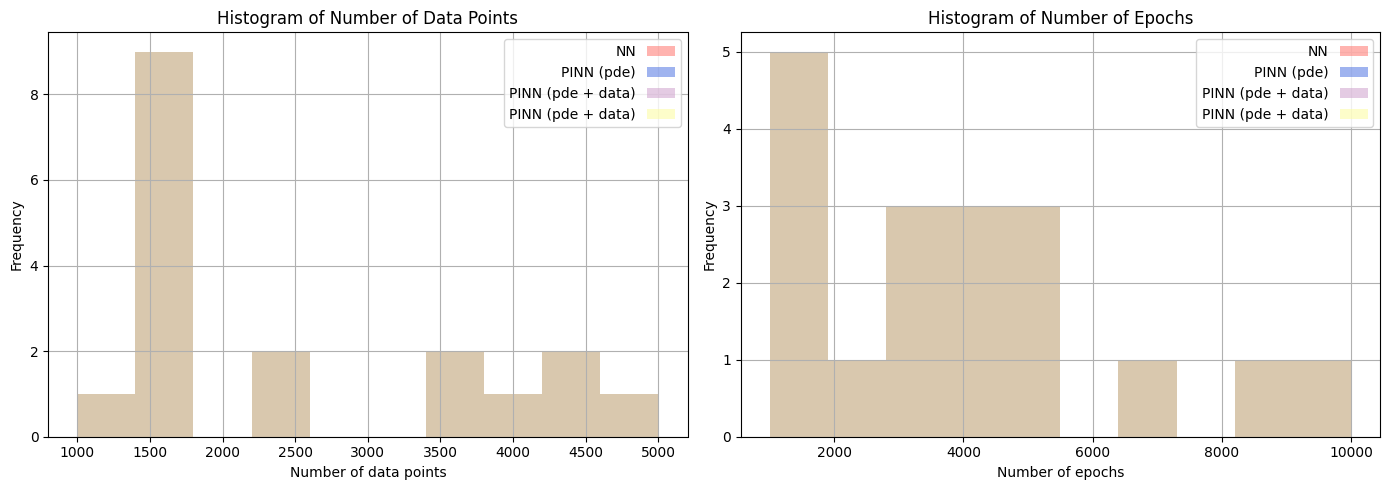

In [288]:
# print min and max of data in df_nn, df_pinn1, df_pinn2
print(f"Min N_data in NN: {df_nn['N_data'].min()}")
print(f"Max N_data in NN: {df_nn['N_data'].max()}")
print(f"Min N_data in PINN1: {df_pinn1['N_data'].min()}")
print(f"Max N_data in PINN1: {df_pinn1['N_data'].max()}")
print(f"Min N_data in PINN2: {df_pinn2['N_data_sum'].min()}")
print(f"Max N_data in PINN2: {df_pinn2['N_data_sum'].max()}")
print(f"Min N_data in PINN3: {df_pinn3['N_data'].min()}")
print(f"Max N_data in PINN3: {df_pinn3['N_data'].max()}")

# print min and max epochs in df_nn, df_pinn1, df_pinn2
print(f"Min N_epochs in NN: {df_nn['N_epochs'].min()}")
print(f"Max N_epochs in NN: {df_nn['N_epochs'].max()}")
print(f"Min N_epochs in PINN1: {df_pinn1['N_epochs_sum'].min()}")
print(f"Max N_epochs in PINN1: {df_pinn1['N_epochs_sum'].max()}")
print(f"Min N_epochs in PINN2: {df_pinn2['N_epochs_sum'].min()}")
print(f"Max N_epochs in PINN2: {df_pinn2['N_epochs_sum'].max()}")
print(f"Min N_epochs in PINN3: {df_pinn3['N_epochs_sum'].min()}")
print(f"Max N_epochs in PINN3: {df_pinn3['N_epochs_sum'].max()}")

# make histogram of N_data
fig, (ax1, ax2), = plt.subplots(1, 2, figsize=(14, 5))
ax1.hist(df_nn["N_data"], bins=10, alpha=0.5, label="NN", color=colors[3])
ax1.hist(df_pinn1["N_data"], bins=10, alpha=0.5, label="PINN (pde)", color=colors[4])
ax1.hist(df_pinn2["N_data_sum"], bins=10, alpha=0.5, label="PINN (pde + data)", color=colors[5])
ax1.hist(df_pinn3["N_data"], bins=10, alpha=0.5, label="PINN (pde + data)", color=colors[6])
ax1.set_xlabel("Number of data points")
ax1.set_ylabel("Frequency")
ax1.set_title("Histogram of Number of Data Points")
ax1.legend(loc='upper right', frameon=True, ncols=1, markerfirst=False)
ax1.grid(True)


# make histogram of N_epochs
ax2.hist(df_nn["N_epochs"], bins=10, alpha=0.5, label="NN", color=colors[3])
ax2.hist(df_pinn1["N_epochs_sum"], bins=10, alpha=0.5, label="PINN (pde)", color=colors[4])
ax2.hist(df_pinn2["N_epochs_sum"], bins=10, alpha=0.5, label="PINN (pde + data)", color=colors[5])
ax2.hist(df_pinn3["N_epochs_sum"], bins=10, alpha=0.5, label="PINN (pde + data)", color=colors[6])
ax2.set_xlabel("Number of epochs")
ax2.set_ylabel("Frequency")
ax2.set_title("Histogram of Number of Epochs")
ax2.legend(loc='upper right', frameon=True, ncols=1, markerfirst=False)
ax2.grid(True)
plt.tight_layout()
plt.show()

In [289]:
# import LinearSegmentedColormap
from matplotlib.colors import LinearSegmentedColormap

# Orange Colormap: Lighter peach to darker burnt orange
cmap_orange = LinearSegmentedColormap.from_list(
    "orange_seq", ["#FFFDF6", "#FFB347", "#B85C00"]
)

# Blue Colormap: Lighter sky blue to deeper navy blue
cmap_blue = LinearSegmentedColormap.from_list(
    "blue_seq", ["#F0F8FF", "#779ECB", "#1A3A60"]
)

# Green Colormap: Lighter mint green to deeper forest green
cmap_green = LinearSegmentedColormap.from_list(
    "green_seq", ["#F5FFF5", "#77DD77", "#1F6F1F"]
)

# Red Colormap: Lighter pink to darker crimson
cmap_red = LinearSegmentedColormap.from_list(
    "red_seq", ["#FFF0F0", "#FF6961", "#8B0000"]
)

In [306]:
[1e-2, 5e-2, 1e-1, 5e-1, 1e0, 5e0]

[0.01, 0.05, 0.1, 0.5, 1.0, 5.0]

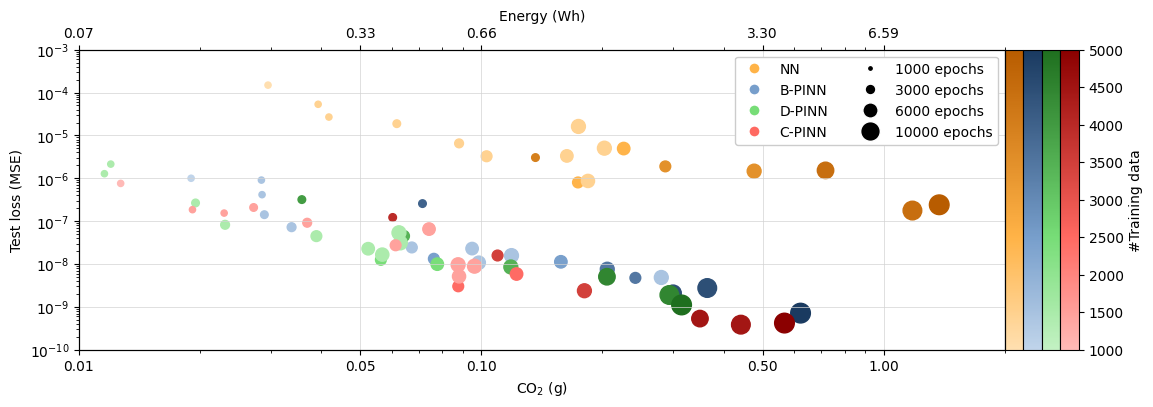

In [340]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import numpy as np

# Example truncate_colormap function
def truncate_colormap(color, minval=0.0, maxval=1.0, n=100):
    cmap = plt.get_cmap(color)
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f"trunc({cmap.name},{minval:.2f},{maxval:.2f})",
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

# Normalize the color scaling to prevent overly faded points
norm_nn = mcolors.Normalize(vmin=df_nn["N_data"].min(), vmax=df_nn["N_data"].max())
norm_pinn1 = mcolors.Normalize(vmin=df_pinn1["N_data"].min(), vmax=df_pinn1["N_data"].max())
norm_pinn2 = mcolors.Normalize(vmin=df_pinn2["N_data_sum"].min(), vmax=df_pinn2["N_data_sum"].max())
norm_pinn3 = mcolors.Normalize(vmin=df_pinn3["N_data"].min(), vmax=df_pinn3["N_data"].max())

# Scaling factor for dot size
scale_factor = 0.02  # Adjust to make the sizes visually appropriate

# Set up the figure and GridSpec
fig = plt.figure(figsize=(10, 3))
gs = GridSpec(1, 5, width_ratios=[10, 0.2, 0.2, 0.2, 0.2], hspace=10)

# Main plot area
ax = fig.add_subplot(gs[0])
scatter_nn = ax.scatter(
    df_nn["CO2"], df_nn["MSE"], 
    c=df_nn["N_data"], cmap=truncate_colormap(cmap_orange, 0.2, 1.0), norm=norm_nn, 
    s=df_nn["N_epochs"] * scale_factor
)
scatter_pinn1 = ax.scatter(
    df_pinn1["CO2"], df_pinn1["MSE"], 
    c=df_pinn1["N_data"], cmap=truncate_colormap(cmap_blue, 0.2, 1.0), norm=norm_pinn1, 
    s=df_pinn1["N_epochs_sum"] * scale_factor
)
scatter_pinn2 = ax.scatter(
    df_pinn2["CO2"], df_pinn2["MSE"], 
    c=df_pinn2["N_data_sum"], cmap=truncate_colormap(cmap_green, 0.2, 1.0), norm=norm_pinn2, 
    s=df_pinn2["N_epochs_sum"] * scale_factor
)

scatter_pinn3 = ax.scatter(
    df_pinn3["CO2"], df_pinn3["MSE"],
    c=df_pinn3["N_data"], cmap=truncate_colormap(cmap_red, 0.2, 1.0), norm=norm_pinn3,
    s=df_pinn3["N_epochs_sum"] * scale_factor
)

# Custom legend for models
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='NN', markerfacecolor=colors[0], markersize=8),
    Line2D([0], [0], marker='o', color='w', label='B-PINN', markerfacecolor=colors[1], markersize=8),
    Line2D([0], [0], marker='o', color='w', label='D-PINN', markerfacecolor=colors[2], markersize=8),
    Line2D([0], [0], marker='o', color='w', label='C-PINN', markerfacecolor=colors[3], markersize=8)

]
#ax.legend(handles=legend_elements, loc="upper right", ncols=2)

# Epoch size legend
size_legend_sizes = [1000, 3000, 6000, 10000]  
size_legend_labels = [1000, 3000, 6000, 10000]  
size_legend = [
    Line2D([0], [0], marker='o', color='w', label=f'{size} epochs', 
           markersize=(size * scale_factor)**0.5, markerfacecolor='black') 
    for size in size_legend_sizes
]
#legend = ax.legend(handles=legend_elements + size_legend, loc=(1.2, 0.5), ncols=1, frameon=False)    
legend = ax.legend(handles=legend_elements + size_legend, loc='upper right', ncols=2, frameon=True)   
legend.get_frame().set_alpha(1.0)

# Labels and scaling
ax.set_xlabel("CO$_2$ (g)")
ax.set_ylabel("Test loss (MSE)")
ax.set_xlim(0, 1.5)
ax.set_xlim(1e-2, 2e0)
ax.set_ylim(1e-10, 1e-3)
ax.set_yscale('log')
ax.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)
ax.set_xscale('log')

x_ticks_position = [1e-2, 5e-2, 1e-1, 5e-1, 1e0]
ax.set_xticks(x_ticks_position)
ax.set_xticklabels(['0.01', '0.05', '0.10', '0.50', '1.00']) 


# Add horizontal colorbars
cbar_ax1 = fig.add_subplot(gs[0, 1])
cb1 = fig.colorbar(scatter_nn, cax=cbar_ax1, orientation="vertical")
cb1.set_ticks([])

cbar_ax2 = fig.add_subplot(gs[0, 2])
cb2 = fig.colorbar(scatter_pinn1, cax=cbar_ax2, orientation="vertical")
cb2.set_ticks([])

cbar_ax3 = fig.add_subplot(gs[0, 3])
cb3 = fig.colorbar(scatter_pinn2, cax=cbar_ax3, orientation="vertical")
cb3.set_ticks([])

cbar_ax4 = fig.add_subplot(gs[0, 4])
cb4 = fig.colorbar(scatter_pinn3, cax=cbar_ax4, orientation="vertical", label = "#Training data")


# Add a second x-axis
ax_top = ax.twiny()  # Create a new x-axis sharing the same y-axis
ax_top.set_xscale('log')
ax_top.set_xlim(ax.get_xlim())  # Align the range with the primary x-axis
ax_top.set_xlabel("Energy (wh)")  # Label for the second x-axis

co2_to_energy = 0.000809788573 / 0.122804680028
energy = np.array(x_ticks_position) * co2_to_energy *1e3 # in wh

# Format energy labels to 1 decimal place
energy_labels = [f"{val:.2f}" for val in energy]

# Set tick positions and labels for the secondary x-axis
ax_top.set_xticks(x_ticks_position)
ax_top.set_xticklabels(energy_labels)
ax_top.set_xlabel("Energy (Wh)")


plt.subplots_adjust(wspace=0, hspace=0)
plt.subplots_adjust(top=1, bottom=0, left=0, right=1)

plt.show()

/var/folders/5c/kvpjh5n11_j2mp3l99c22xdr0000gn/T/ipykernel_57292/1596026716.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels([f"{i}" for i in x])


[0.01, 0.05, 0.1, 0.5, 1.0]


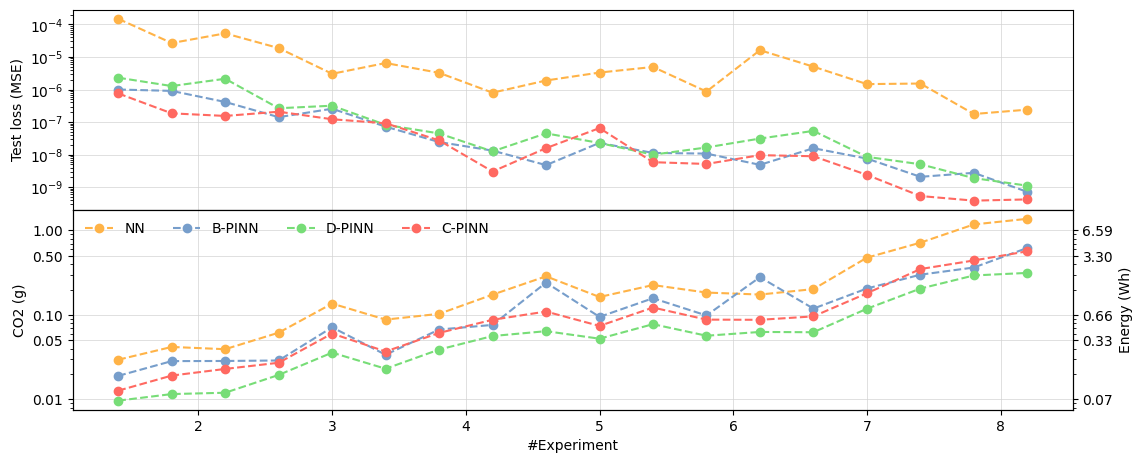

In [341]:
# plot mse as a function of numbers (1-18) for the three pinns

fig, axes = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

x = np.arange(1, 19)
axes[0].plot(x, df_nn["MSE"], label="NN", color=colors[0], marker='o', ls='--')
axes[0].plot(x, df_pinn1["MSE"], label="B-PINN", color=colors[1], marker='o', ls='--')
axes[0].plot(x, df_pinn2["MSE"], label="D-PINN", color=colors[2], marker='o', ls='--')
axes[0].plot(x, df_pinn3["MSE"], label="C-PINN", color=colors[3], marker='o', ls='--')


axes[1].plot(x, df_nn["CO2"], label="NN", color=colors[0], marker='o', ls='--')
axes[1].plot(x, df_pinn1["CO2"], label="B-PINN", color=colors[1], marker='o', ls='--')
axes[1].plot(x, df_pinn2["CO2"], label="D-PINN", color=colors[2], marker='o', ls='--')
axes[1].plot(x, df_pinn3["CO2"], label="C-PINN", color=colors[3], marker='o', ls='--')


axes[0].set_ylabel("Test loss (MSE)")
axes[1].set_ylabel("CO2 (g)")

axes[0].grid(True, color='lightgrey', linestyle='-', linewidth=0.5)
axes[1].grid(True, color='lightgrey', linestyle='-', linewidth=0.5)

axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[1].set_xlabel("#Experiment")
axes[1].set_xticklabels([f"{i}" for i in x])
axes[1].legend(loc='upper left', frameon=False, ncols=4, markerfirst=True)

#x_ticks_position = [1e-2, 5e-2, 1e-1, 5e-1, 1e0]
axes[1].set_yticks(x_ticks_position)
axes[1].set_yticklabels(['0.01', '0.05', '0.10', '0.50', '1.00'])

# make second y-axis for energy
axes2 = axes[1].twinx()
axes2.set_yscale('log')
axes2.set_ylabel("Energy (Wh)")
print(x_ticks_position)
axes2.set_yticks(x_ticks_position)
axes2.set_yticklabels(energy_labels)
axes2.set_ylim(axes[1].get_ylim()) 


# Adjust layout and show plot
plt.subplots_adjust(hspace=0, wspace=0) 
plt.subplots_adjust(top=1, bottom=0, left=0, right=1)
plt.show()




In [326]:
x_ticks_position

[0.01, 0.05, 0.1, 0.5, 1.0]

# Old code

In [ ]:
# Create a DataFrame
df_nn = pd.DataFrame(columns=["idx", "N_epochs","N_data", "MSE", "CO2"])

# Data to be added
data_nn = [
    ['nn1a', 5000, 2000, 1.375388e-06, 0.290426954223],
    ['nn2a', 3000, 2500 , 7.806079e-06, 0.177354614504], 
    ['nn3a', 3000, 5000, 1.148412e-06, 0.430662349541],
    ['nn4a', 1000, 4000, 5.830257e-06, 0.111952416561],  
    ['nn5a', 5000, 1000, 0.000121, 0.132658226449],
    ['nn6a', 10000, 1000, 0.000079, 0.266331642696],
    ['nn7a', 10000, 1000, 0.000003, 0.269784432406], 
    ['nn8a', 4000, 3500, 3.084002e-06, 0.424888125897],
    ['nn9a', 7000, 3000, 3.501593e-07, 0.652599871597],   
    ['nn10a', 7000, 4000, 4.085369e-07, 0.812378672172],
    ['nn11a', 10000, 2000, 5.992700e-07, 0.547597256124],
    ['nn12a', 8000, 2000, 8.682708e-07, 0.396817441906],
    ['nn13a', 9000, 2000, 1.300455e-06, 0.637129227281],
    ['nn14a', 8000, 2000, 4.988387e-07, 0.347462612653],
    ['nn15a', 7000, 4456, 3.747623e-07, 0.731798164631], 
    ['nn16a', 5000, 5000, 3.988936e-07, 0.725739292288],   
    ['nn17a', 5000, 1000, 4.014488e-07, 0.542870566712],     
    ['nn18a', 7000, 1000, 5.524618e-06, 0.209464282480],     
]

# Add the data to the DataFrame
df_nn = pd.DataFrame(data_nn, columns=["idx", "N_epochs", "N_data", "MSE", "CO2"])

# Create a DataFrame
df_pinn2 = pd.DataFrame(columns=["N_epochs", "N_data", "MSE", "CO2"])

# Add data to the DataFrame
data_pinn2 = [
    [[1000, 2000], [1000, 100],  8.427277e-09, 0.050335945857], 
    [[1000, 2000], [1000, 200],  1.038398e-08, 0.051967470409], 
    [[2000, 2000], [1000, 200],  9.842012e-09, 0.066820279964], 
    [[2000, 2000], [500, 200],  3.761626e-08, 0.048299233746], 
    [[1000, 2000], [500, 500],  3.709764e-08, 0.040690234639], 
    [[500, 1800], [500, 500],  3.376851e-08, 0.035805083458], 
    [[500, 1000], [500, 300],  2.825331e-08, 0.020794201324], 
    [[500, 1000], [500, 300],  2.825331e-08, 0.020794201324], 
    [[500, 500], [300, 300],  1.421245e-06, 0.010391889486], 
    [[500, 800], [300, 300],  4.935711e-07, 0.014590034167], 
    [[600, 1000], [300, 300], 2.281021e-07, 0.019532137169], 
    [[1000, 2500], [800, 800], 1.578863e-08, 0.062976505121], 
    [[2000, 3500], [800, 800], 1.143685e-08, 0.089937254148], 
    [[4000, 5000], [1000, 1000], 1.256352e-09, 0.162202591675], 
    #[[5000, 6000], [1000, 1000], 1.566634e-09, 0.199270533044],    # Too many epochs
    [[1000, 2000], [2544, 2000], 1.900368e-08, 0.122804680028],  
    [[3000, 4000], [1000, 1000], 3.770974e-09, 0.119609573627], 
    [[3000, 4000], [344, 200], 6.400024e-08, 0.075424891362],  
    #[[5000, 6000], [2000, 2000], 1.097300e-09, 0.299775360181 ],   # Too many epochs
    [[5000, 5000], [2000, 2000],  1.044995e-09, 0.298428397143],  
] 

# Add the data to the DataFrame
df_pinn2 = pd.DataFrame(data_pinn2, columns=["N_epochs", "N_data", "MSE", "CO2"])

# Sum data and add number of initial and boundary points 
df_pinn2["N_data_sum"] = df_pinn2["N_data"].apply(sum)
df_pinn2["N_data_sum"] = df_pinn2["N_data_sum"] + N_init + N_bound

# Sum number of epochs
df_pinn2["N_epochs_sum"] = df_pinn2["N_epochs"].apply(sum)

# sort df after number of epochs and if there are equal number of epochs after number of data
df_pinn2 = df_pinn2.sort_values(by=['N_epochs_sum', 'N_data_sum'], ascending=[True, True])